## House Prices Prediction


## Steps->
#### 1. Data Analysis
#### 2. Feature Engineering
#### 3. Feature Selection
#### 4. Model Building
#### 5. Model Development 

In [73]:
import pandas as pd   # or pip install pyforest
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to enable the inline plotting,where the plots/graphs will be displayed just below the cell where
#your plotting commands are written

In [74]:
datasets = pd.read_csv("train.csv")
datasets.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
datasets.shape
datasets.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Analysis 

#### What we do in data analysis?
##### 1->FInd Missing values
##### 2-> All the Numerical Variables
##### 3-> Distribution of the Numerical Variables
##### 4-> Categorical Variables
##### 5-> Cardinality of Categorical Variables
##### 6-> Outliers
##### 7-> Relation b/w independent and dependent feature

### 1-> Missing Values

In [76]:
features_na=[features for features in datasets.columns if datasets[features].isnull().sum()>1]

In [96]:
for feature in features_na:
    print("{} {} % of missing values".format(feature,np.round(datasets[feature].isnull().mean(), 4)))
#     print("total missing value of {} : {}".format(feature,datasets[feature].isnull().sum()))

LotFrontage 0.1774 % of missing values
Alley 0.9377 % of missing values
MasVnrType 0.0055 % of missing values
MasVnrArea 0.0055 % of missing values
BsmtQual 0.0253 % of missing values
BsmtCond 0.0253 % of missing values
BsmtExposure 0.026 % of missing values
BsmtFinType1 0.0253 % of missing values
BsmtFinType2 0.026 % of missing values
FireplaceQu 0.4726 % of missing values
GarageType 0.0555 % of missing values
GarageYrBlt 0.0555 % of missing values
GarageFinish 0.0555 % of missing values
GarageQual 0.0555 % of missing values
GarageCond 0.0555 % of missing values
PoolQC 0.9952 % of missing values
Fence 0.8075 % of missing values
MiscFeature 0.963 % of missing values


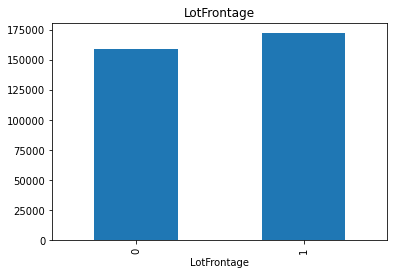

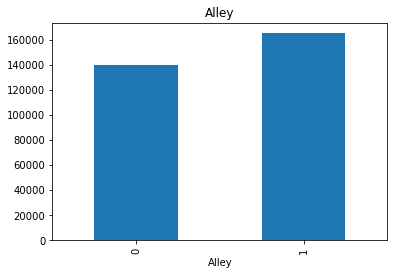

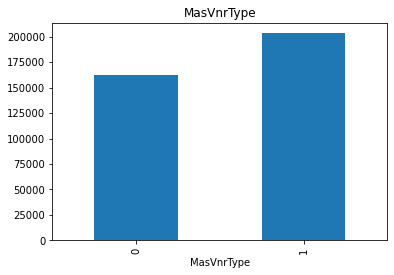

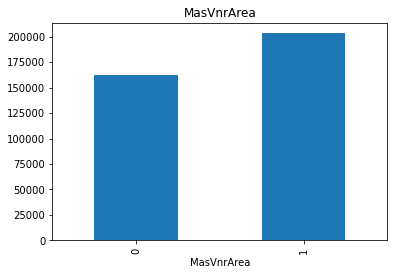

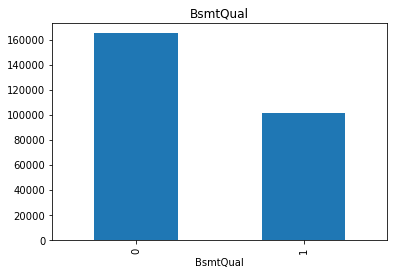

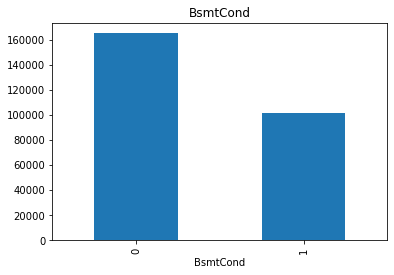

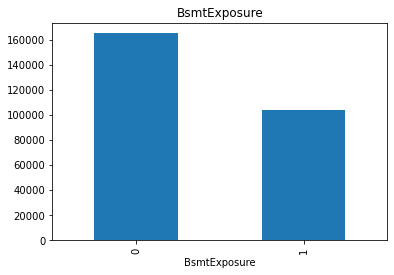

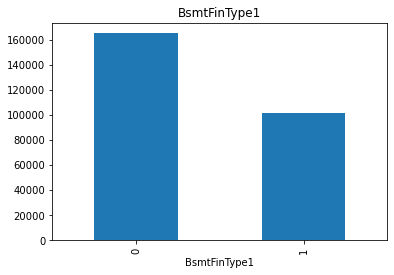

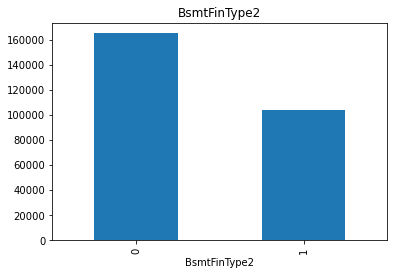

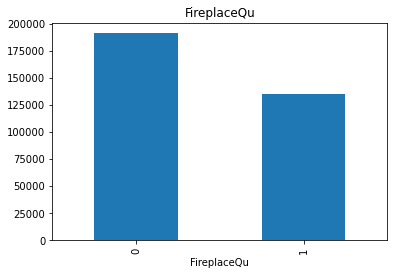

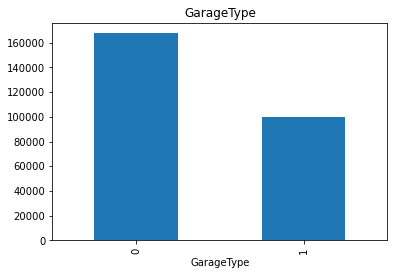

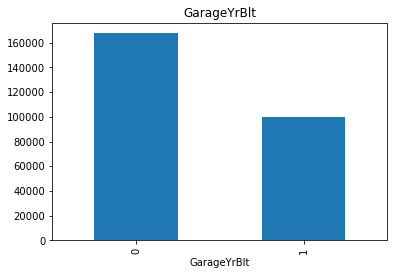

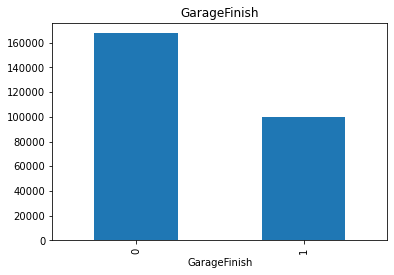

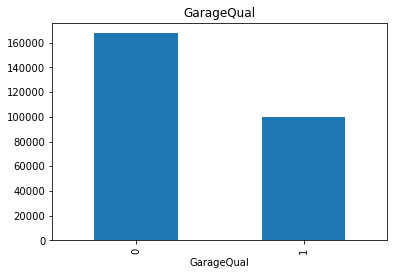

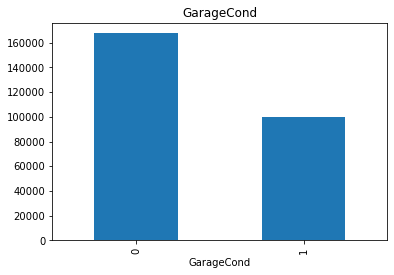

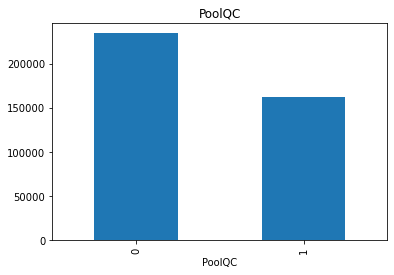

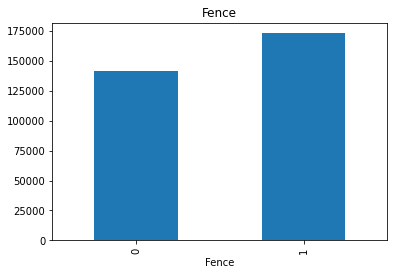

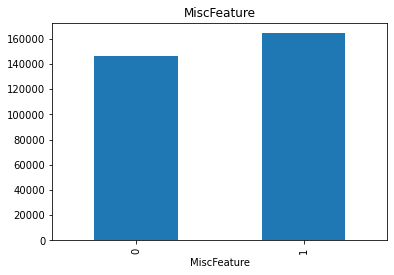

In [78]:
#lots of data found so now check the relation between na_features and output data(SalePrice)
for feature in features_na:
    data = datasets.copy()  
    data[feature] = np.where(data[feature].isnull(), 1, 0)  #1->null , 0->not null
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [79]:
# form graph it is clear that features_na has relation ...output data


# features with all unique value we can drop like Id


### 2-> Numerical Columns 

In [80]:
features_num = [feature for feature in datasets.columns if datasets[feature].dtypes != 'O']
datasets[features_num].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [81]:
#now check dummy variables in features_num
features_yr = [feature for feature in features_num if 'Yr' in feature or 'Year' in feature]
features_yr

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'House_Price(MEdian)')

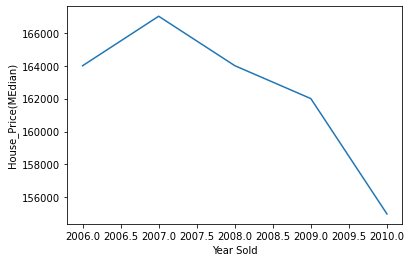

In [82]:
#now check whether they are realted to ouput feature or not
datasets.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('House_Price(MEdian)')

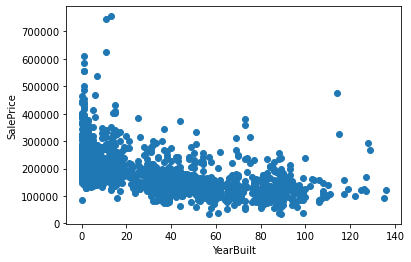

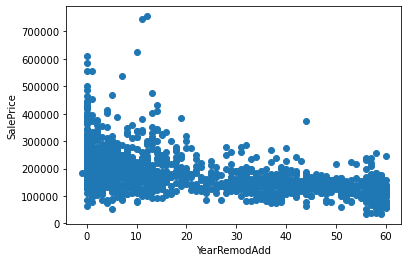

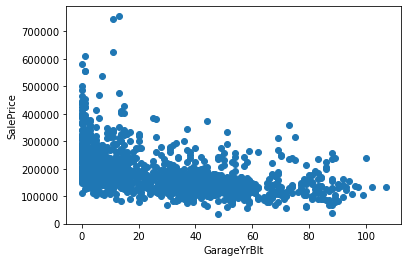

In [83]:
#now check for other features of features_yr...w r t YrSold
for feature in features_yr:
    if feature!='YrSold':
        data=datasets.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

### 3-> Distribution of the Numerical Variables 

In [84]:
#numerical Variables are divided into two types discrete and continuous
features_dis=[feature for feature in features_num if len(datasets[feature].unique())<25 and feature not in features_yr+['Id']]
print(len(features_dis))
datasets[features_dis].head()

17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


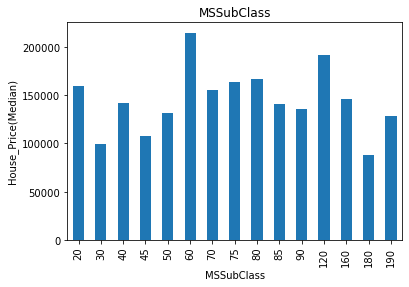

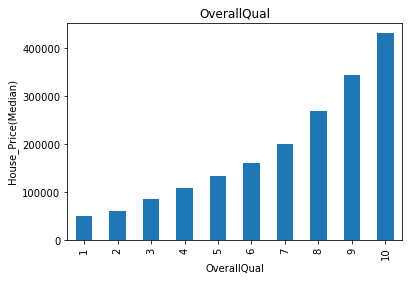

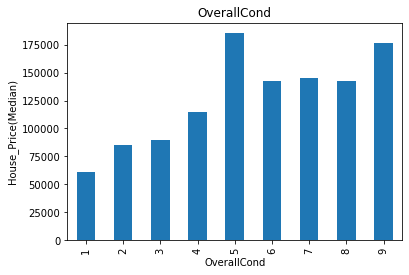

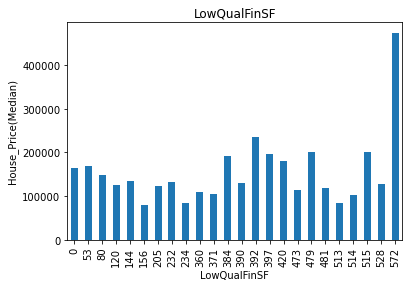

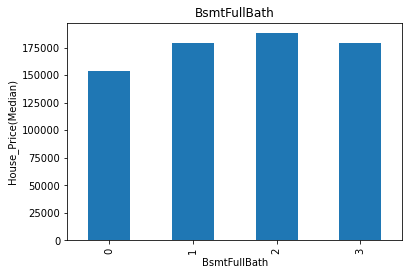

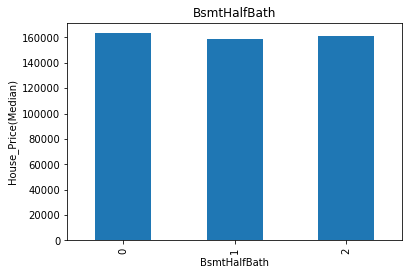

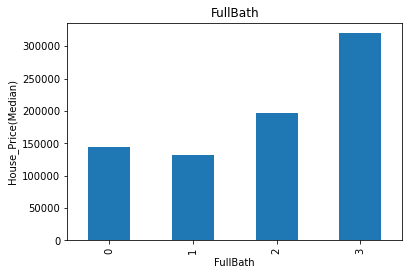

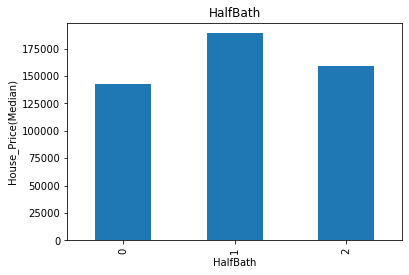

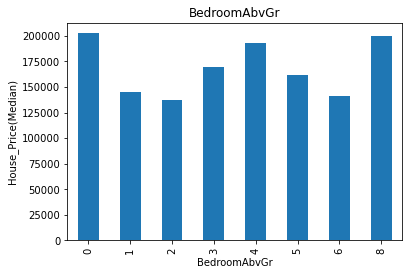

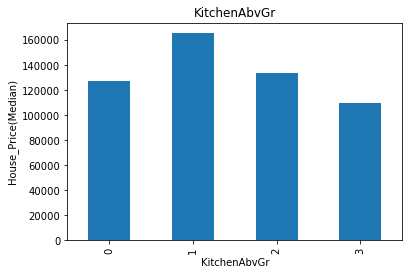

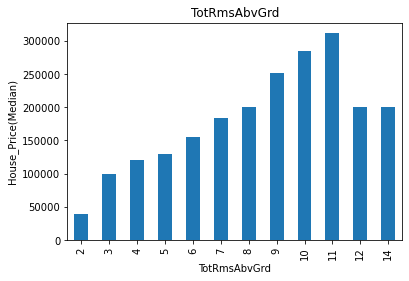

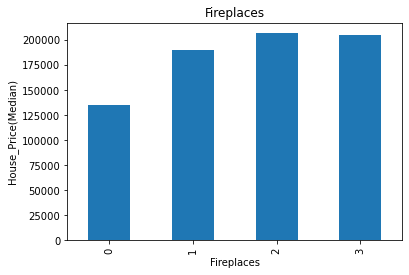

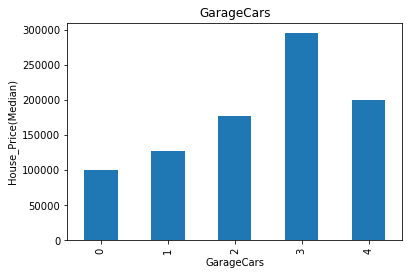

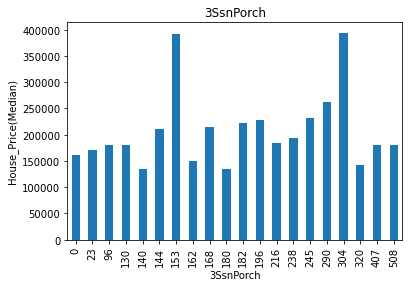

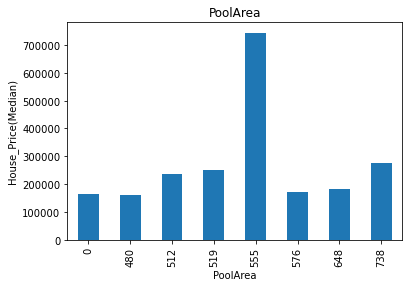

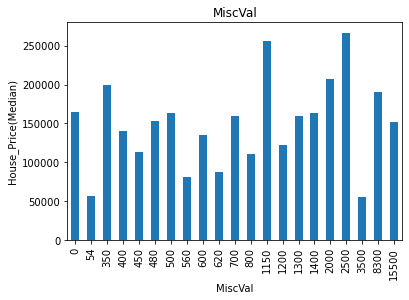

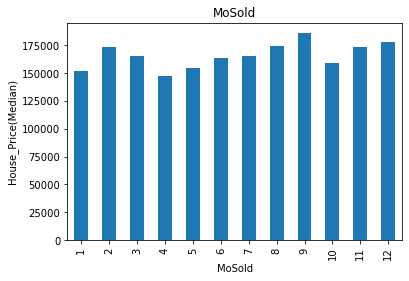

In [85]:
#same as do in temp variables...check relation with output
for feature in features_dis:
    data=datasets.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('House_Price(Median)')
    plt.title(feature)
    plt.show()


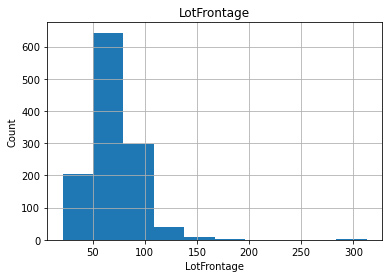

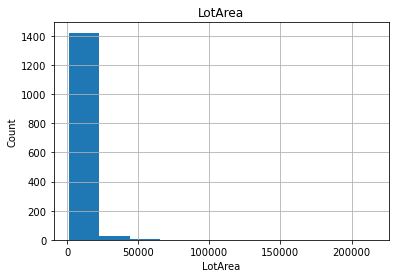

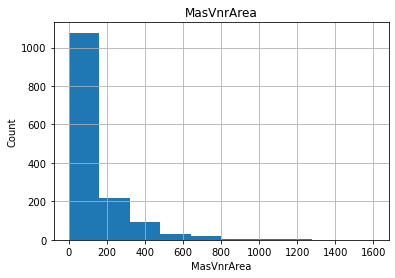

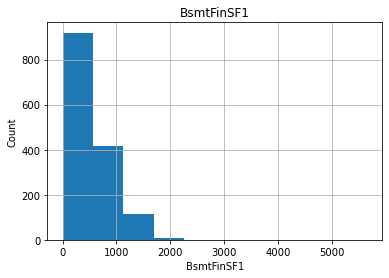

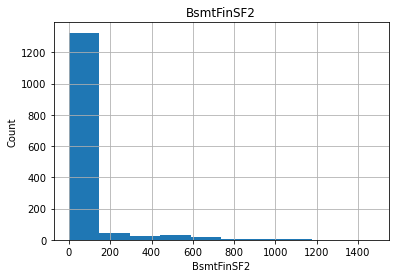

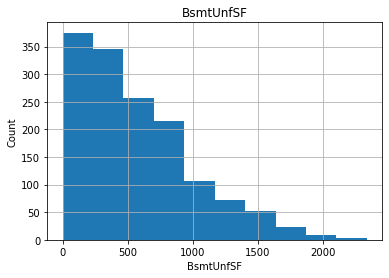

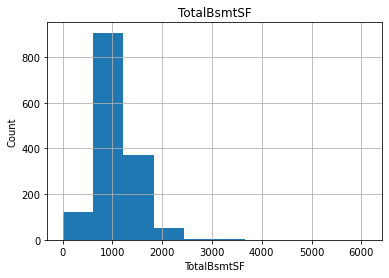

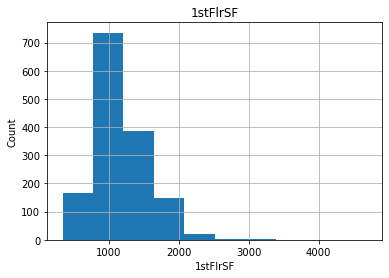

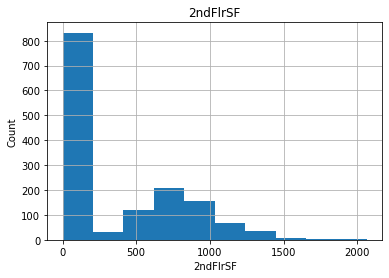

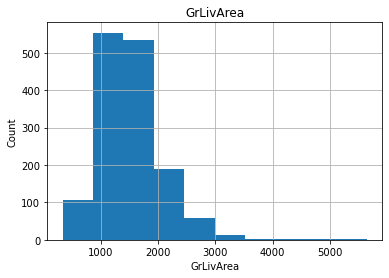

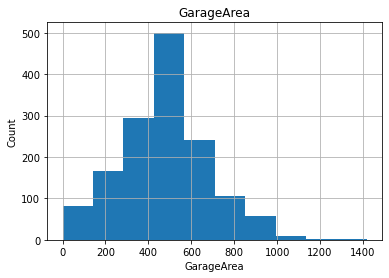

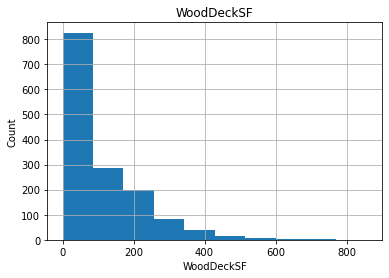

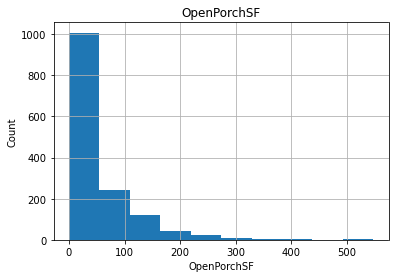

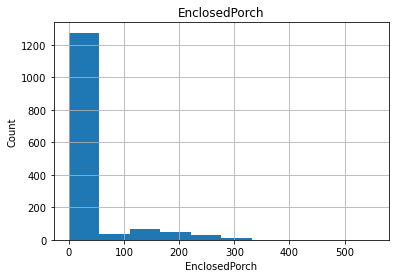

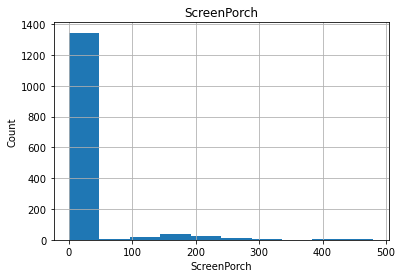

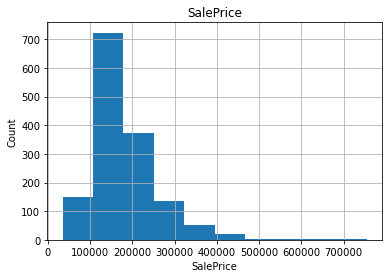

In [86]:
#now Continuous variables
features_con = [feature for feature in features_num if feature not in features_yr + ['Id']+ features_dis]
for feature in features_con:
    data=datasets.copy()
    data[feature].hist() 
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [87]:
#use longarithmin transformation (log-normal distribution

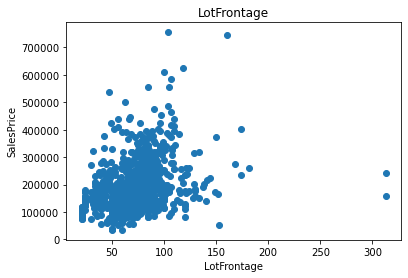

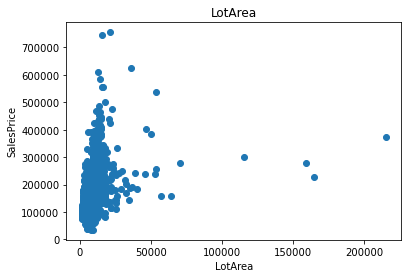

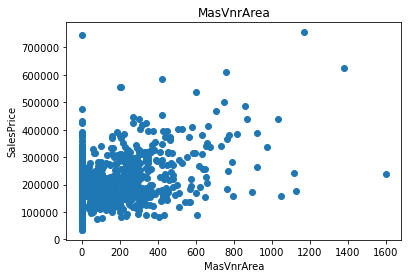

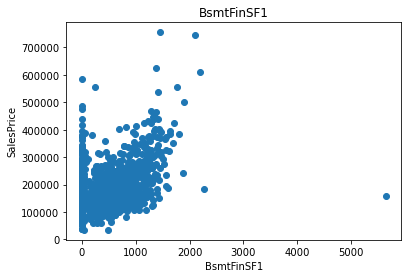

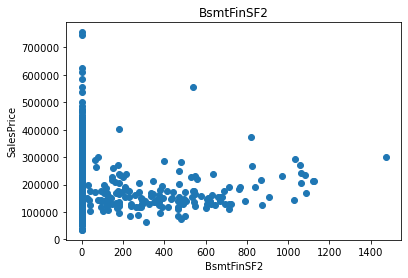

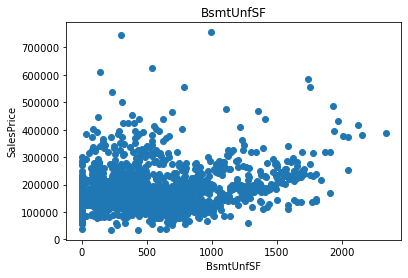

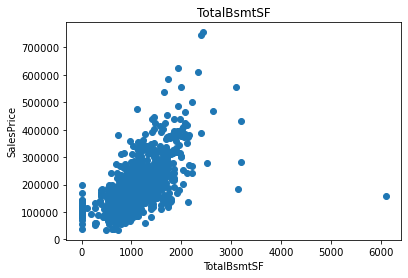

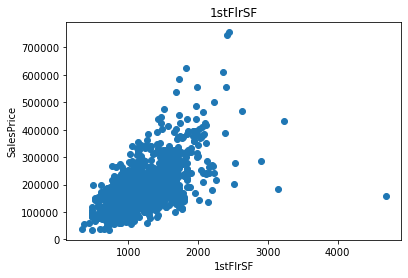

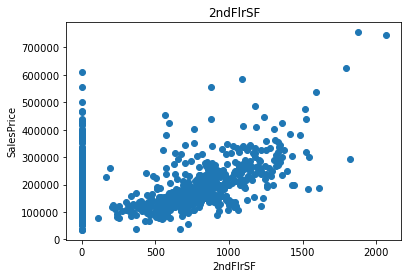

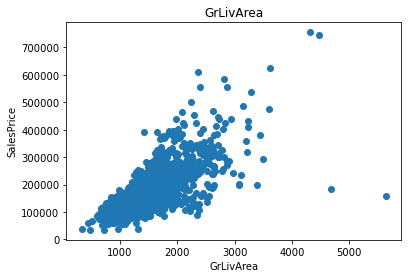

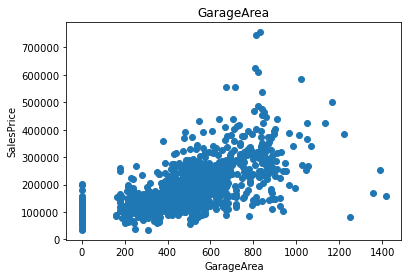

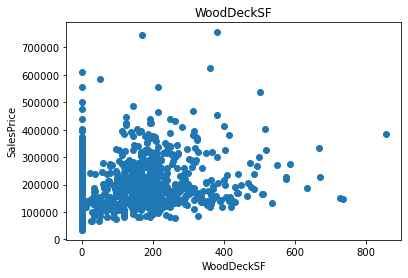

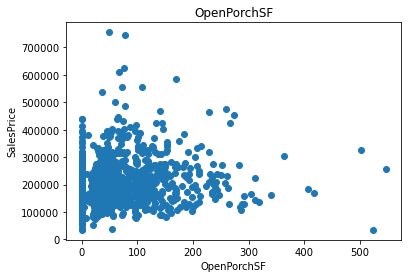

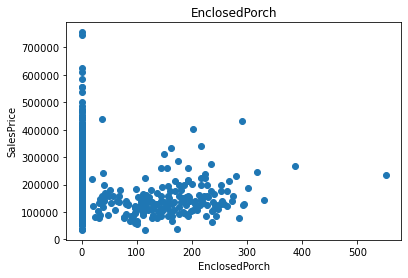

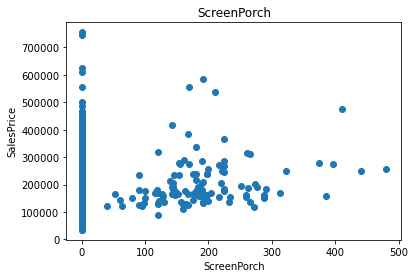

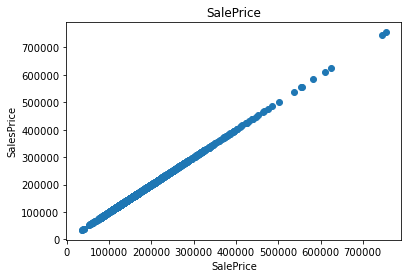

In [100]:
for feature in features_con:
    data=datasets.copy()
    if 0 in data[feature].unique():
        pass
    if feature is ['SalePrice']:
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

### 4-> Categorical Variables

In [89]:
features_cat=[feature for feature in datasets.columns if data[feature].dtypes=='O']
datasets[features_cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


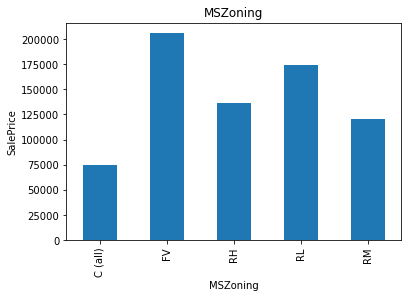

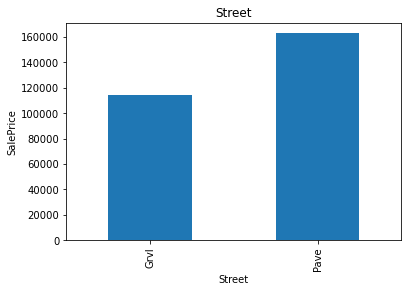

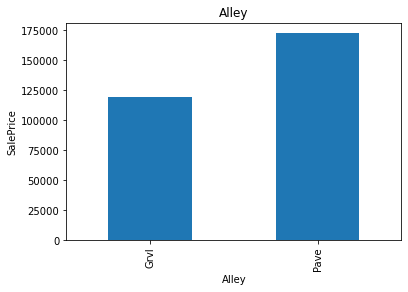

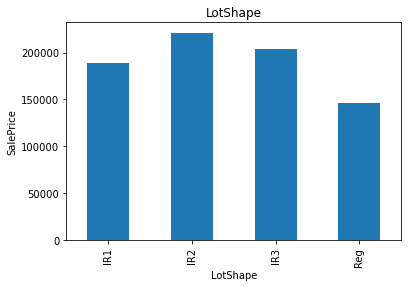

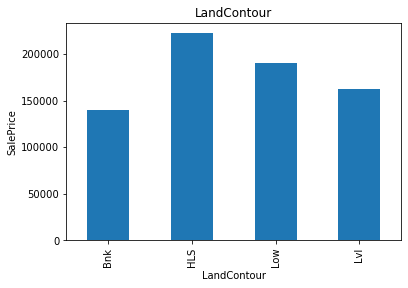

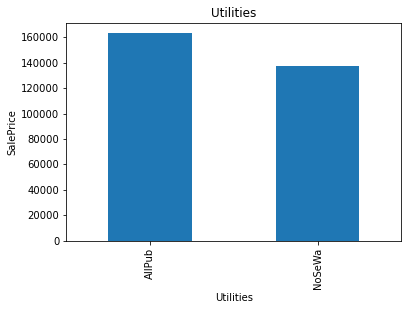

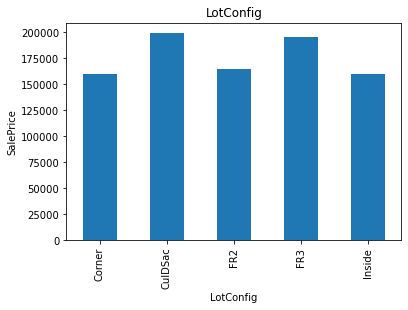

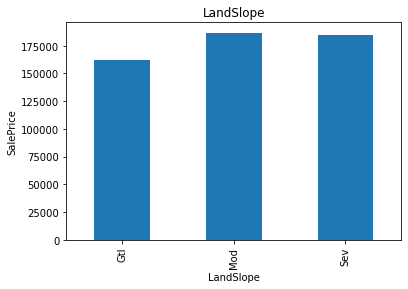

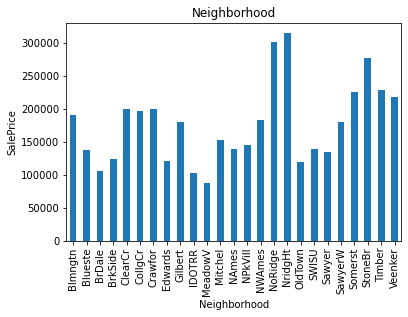

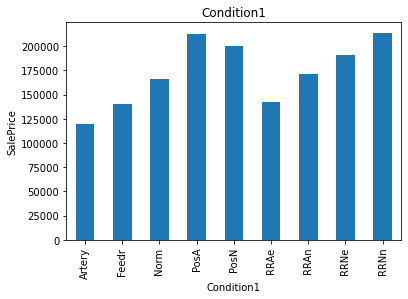

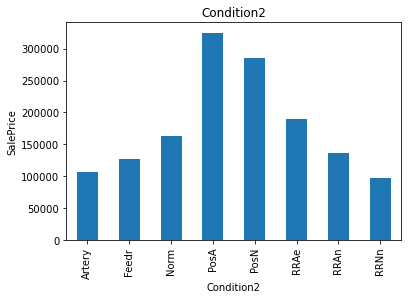

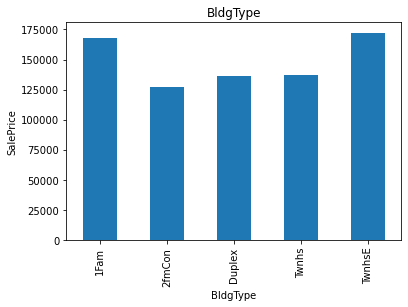

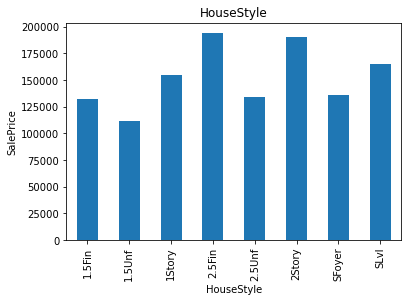

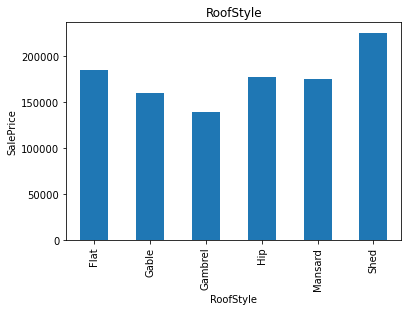

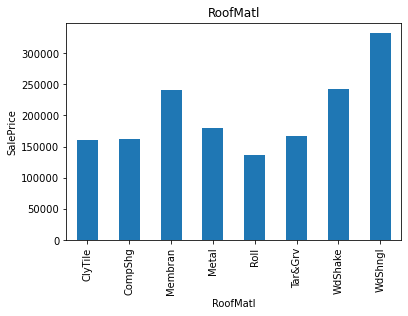

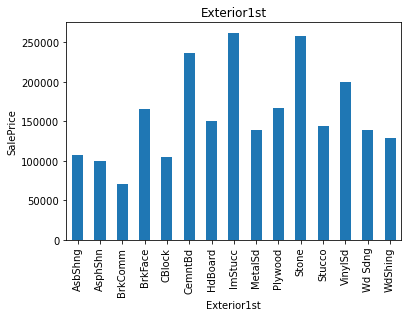

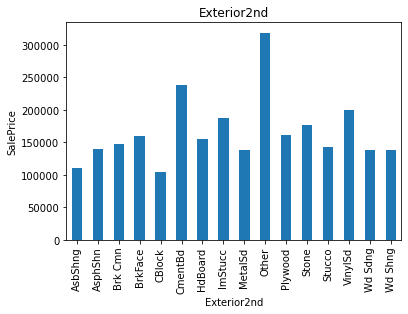

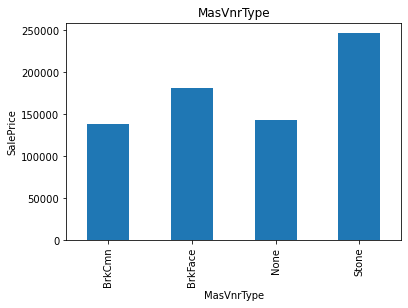

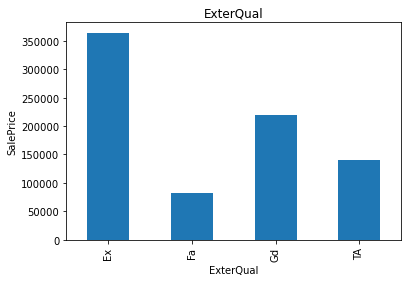

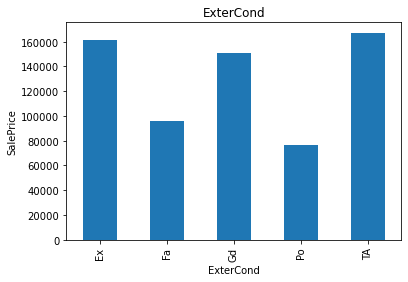

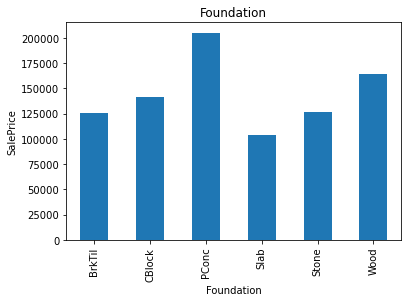

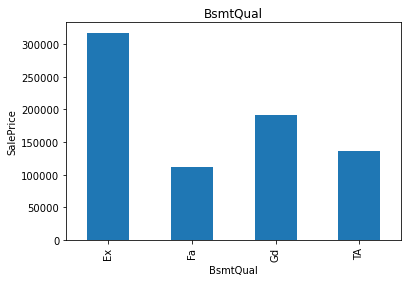

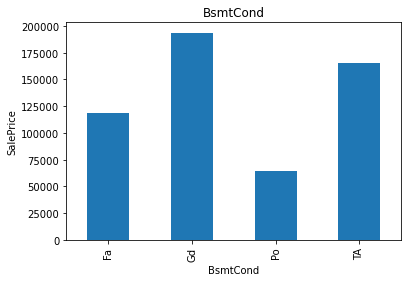

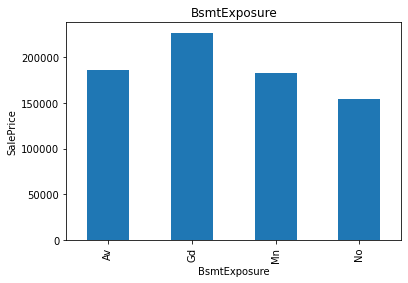

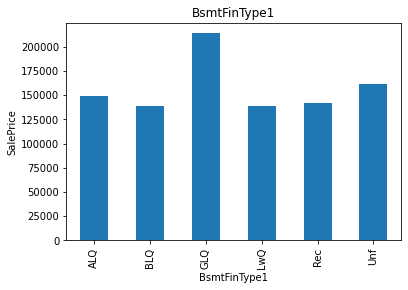

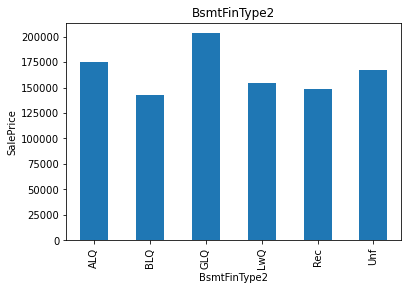

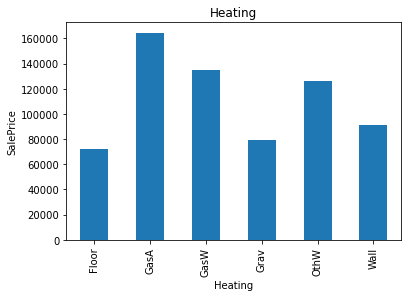

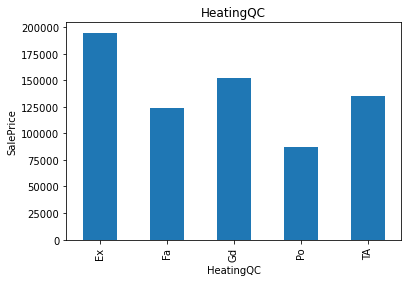

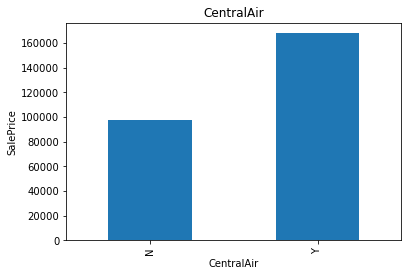

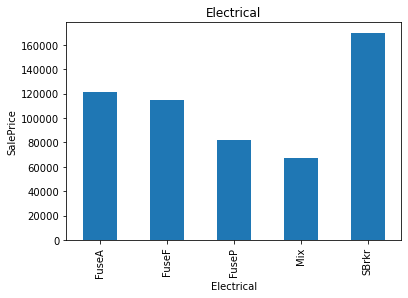

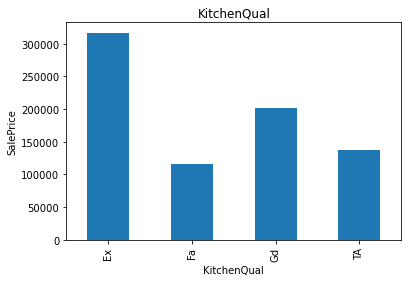

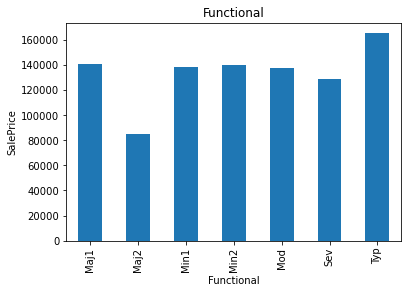

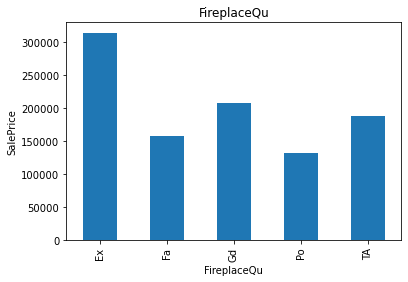

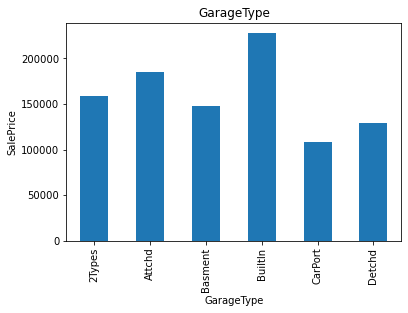

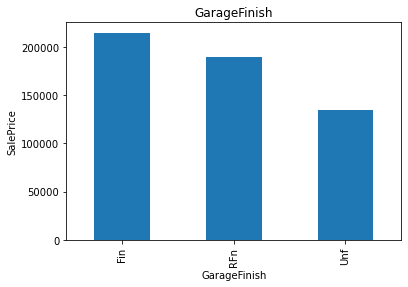

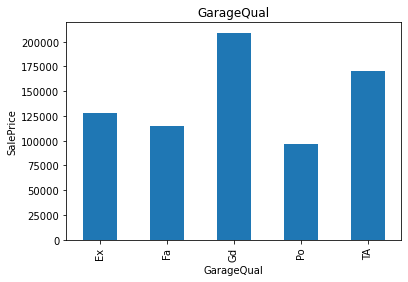

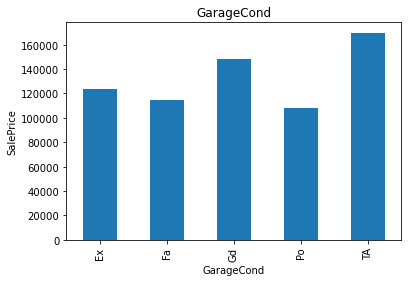

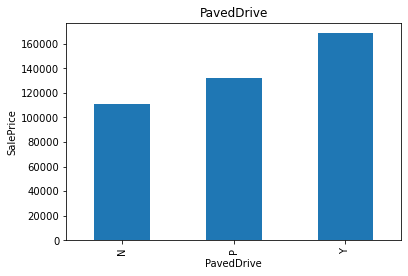

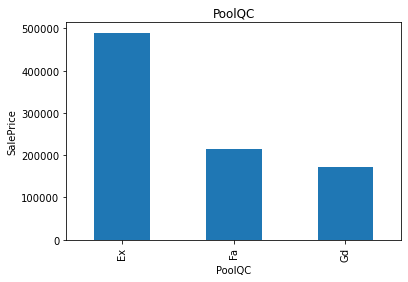

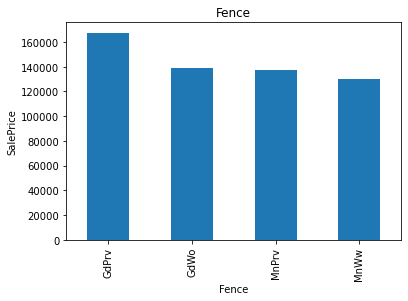

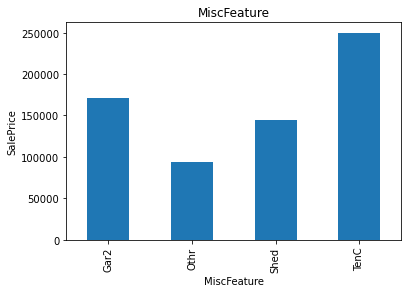

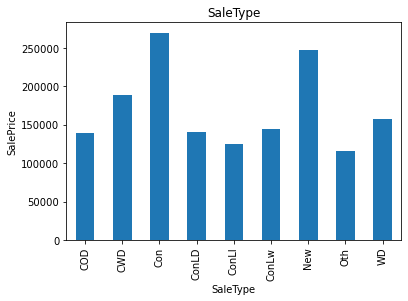

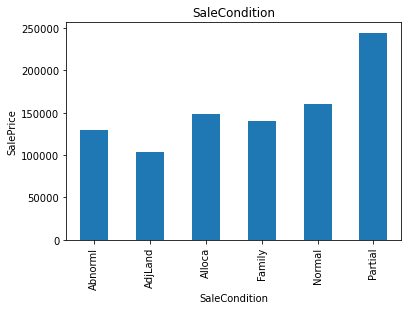

In [91]:
#relation b/w features_cat vs SalePrice
for feature in features_cat:
    data=datasets.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

###  Outliers

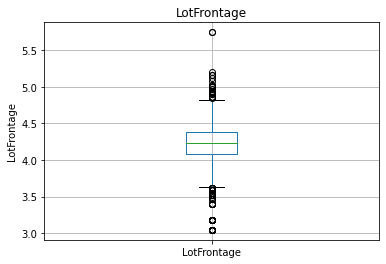

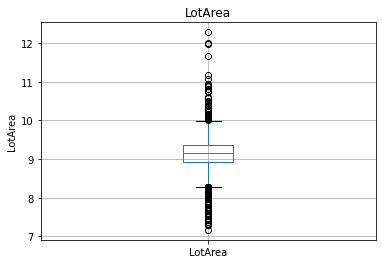

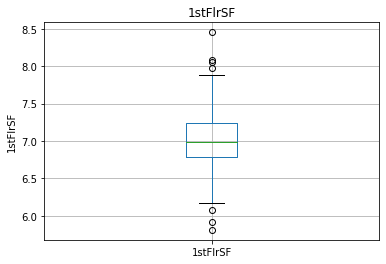

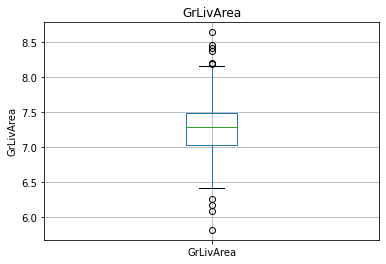

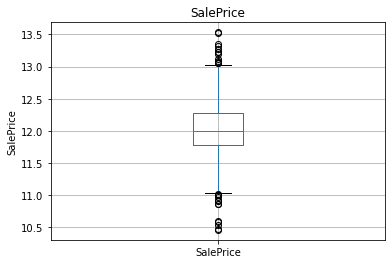

In [92]:
for feature in features_con:
    data = datasets.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] =np.log(data[feature])
        data.boxplot(column=feature)  # boxplot is used for finding outlier ,and used for only continous features
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()